In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size':22})

import warnings
warnings.filterwarnings('ignore')

[0] minimum sample size per bin: 76
[1] minimum sample size per bin: 77
[2] minimum sample size per bin: 75
[3] minimum sample size per bin: 71
[0] minimum sample size per bin: 60
[1] minimum sample size per bin: 60
[2] minimum sample size per bin: 66
[3] minimum sample size per bin: 31
[0] minimum sample size per bin: 60
[1] minimum sample size per bin: 60
[2] minimum sample size per bin: 66
[3] minimum sample size per bin: 31


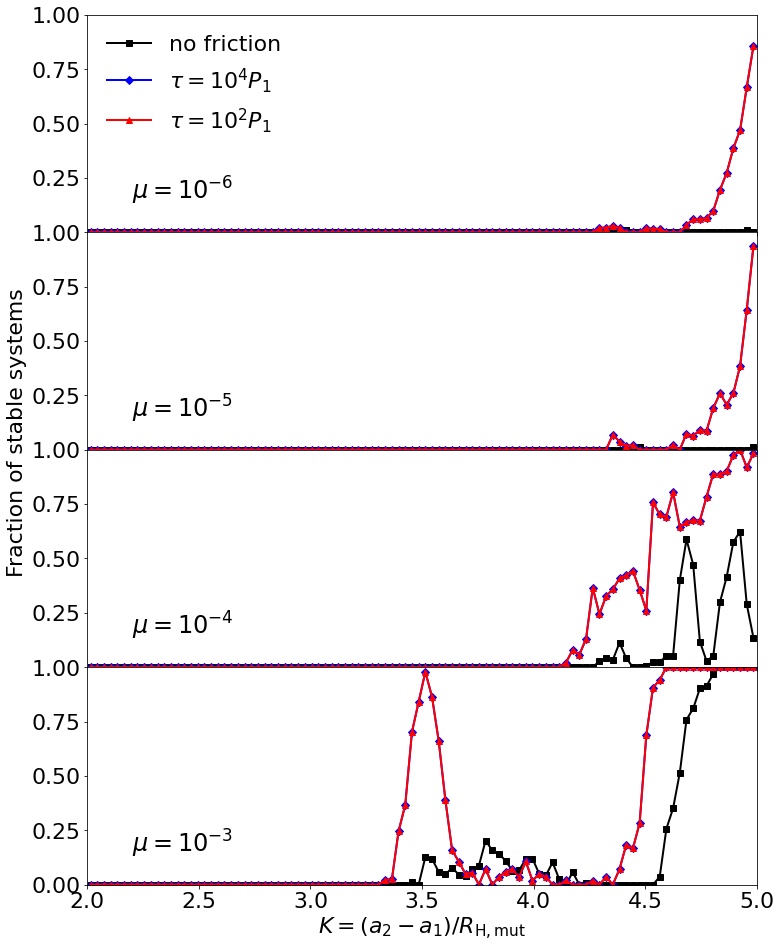

In [23]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = [1e-6,1e-5,1e-4,1e-3]


fig,axs = plt.subplots(4,1, sharex=True, sharey=False, figsize=(12,16))
fig.subplots_adjust(hspace=0.0)



for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('./data/res/3p/no-gas-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,5,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    axs[iii].plot(bins,safe_hist/tot_hist,'s-',c='k',lw=2,label='no friction')
    #axs[iii].scatter(bins,safe_hist/tot_hist,c='k',s=10,marker='s')
    

    axs[iii].text(2.20,0.15,r'$\mu=10^{-%d}$'%int(dir_name_list[iii]),fontsize=24)
    

    
    axs[iii].set_yticks([0.25,0.5,0.75,1.0])
    axs[iii].set_ylim([0.0,1.0])

    
for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('./data/res/3p/t4-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,5,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    axs[iii].plot(bins,safe_hist/tot_hist,'D-',c='b',lw=2,label=r'$\tau = 10^4P_1$')

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('./data/res/3p/t4-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,5,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    axs[iii].plot(bins,safe_hist/tot_hist,'^-',c='r',lw=2,label=r'$\tau = 10^2P_1$')
    
        
    
axs[-1].set_yticks([0.0,0.25,0.5,0.75,1.0])
axs[0].legend(frameon=False)
    
axs[-1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2].set_ylabel('                                    Fraction of stable systems')

axs[-1].set_xlim([2.0,5.0])
axs[-1].set_ylim([0.0,1.0])
#axs[3].set_xticks(np.linspace(2.0,4.0,11))

plt.savefig('./pics/pics-fraction-N3-T6-rev.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-fraction-N3-T6-rev.png',bbox_inches='tight',transparent=True)

[ 1.27428286 -2.49723457] [0.03097389 0.1278866 ]
[ 1.30422631 -2.62791276] [0.02744749 0.11198006]
[ 2.05729138 -5.35249797] [0.04316962 0.17154376]
[ 1.6572379  -3.14049176] [0.07890355 0.29499364]


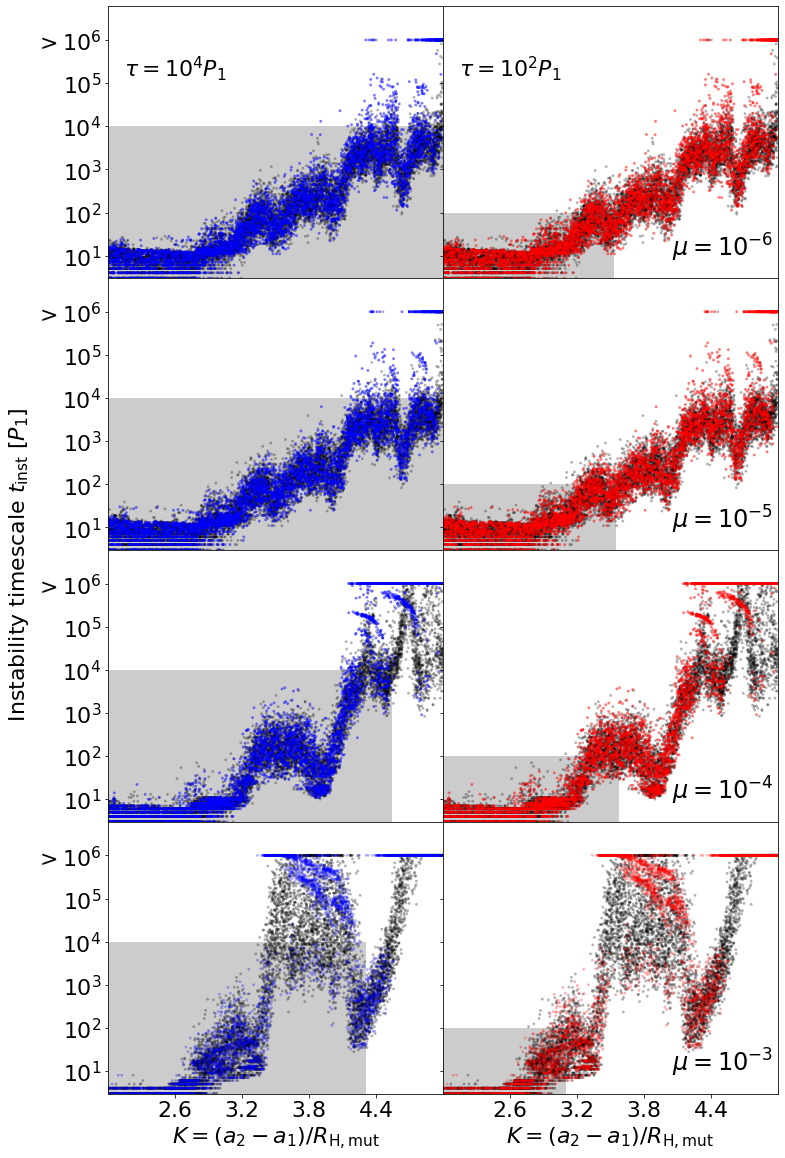

In [17]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


def K_to_Tsyn(K,mu):
    a1 = 1.
    eta = ((mu)/3.)**(1./3.)
    RH = (eta/(1.-0.5*K*eta)) * a1
    a2 = a1+ K*RH
    T1 = a1**1.5
    T2 = a2**1.5
    Tsyn = 1/(1./T1-1./T2)
    return Tsyn

K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

K_gz_list = [3.29,3.19,3.01,2.65]
K_crit_list = [3.47,3.47,3.43,3.69]

dir_name_list = [6,5,4,3]
mu_l = [1e-6,1e-5,1e-4,1e-3]


fig,axs = plt.subplots(4,2, sharex=True, sharey=True,figsize=(12,20))
fig.subplots_adjust(hspace=0.0,wspace=0.0)



for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('./data/res/3p/no-gas-m1e-%1d.npy'%(dir_name_list[iii]))
    K =  data[:,2]
    Tinst = data[:,3]
    axs[iii,0].scatter(K,Tinst,c='k',s=8,alpha=0.3,edgecolors='none',rasterized=True)
    axs[iii,0].set_yscale('log')
    axs[iii,0].set_ylim([3.0e0,6e6])
    axs[iii,0].set_yticks([1e1,1e2,1e3,1e4,1e5,1e6])
    axs[iii,0].set_yticklabels([r'$10^{1}$',r'$10^{2}$',r'$10^{3}$',r'$10^{4}$',r'$10^{5}$',r'$>10^{6}$'])  
    axs[iii,1].scatter(K,Tinst,c='k',s=8,alpha=0.3,edgecolors='none',rasterized=True)
    axs[iii,1].set_yscale('log')
    axs[iii,1].set_ylim([3.0e0,6e6])
    axs[iii,1].set_yticks([1e1,1e2,1e3,1e4,1e5,1e6])
    axs[iii,1].set_yticklabels([r'$10^{1}$',r'$10^{2}$',r'$10^{3}$',r'$10^{4}$',r'$10^{5}$',r'$>10^{6}$']) 
    axs[iii,1].text(4.05,1e1,r'$\mu=10^{-%d}$'%int(dir_name_list[iii]),fontsize=24)

    
    Tsyn = K_to_Tsyn(K,mu)
    Kl = np.linspace(2,5,100)
    Tsynl =  K_to_Tsyn(Kl,mu)
    for ik in range(len(Kl)-1):
        ind_k = (K>Kl[ik]) * (K<Kl[ik+1])
        K_sub = K[ind_k]
        Tinst_sub = Tinst[ind_k]
        if np.sum(Tinst_sub>Tsynl[ik])>(0.5*np.sum(Tinst_sub>0)):
            Ksyn = 0.5*(Kl[ik]+Kl[ik+1])
            break
            
    Kl = np.linspace(2,Ksyn,100)
    Tsynl =  K_to_Tsyn(Kl,mu)        
    
    def Tins_fit(K,b,c):
        return b*K+c
    
    ind_fit = (K>Ksyn) * (data[:,0]<0.5)
    X_fit = K[ind_fit]
    Y_fit = np.log10(Tinst[ind_fit])
    popt, pcov = curve_fit(Tins_fit, X_fit, Y_fit)
    print(popt,np.sqrt(np.diag(pcov))*3)
    kk_fit = np.linspace(Ksyn,5.0,11)
    
    K_crit_fit = np.interp(4, Tins_fit(kk_fit, *popt),kk_fit)
    axs[iii,0].fill_between([2,K_crit_fit],[1e-2,1e-2],[1e4,1e4],edgecolor='none',facecolor='k',alpha=0.2)
    K_crit_fit = np.interp(2, Tins_fit(kk_fit, *popt),kk_fit)
    axs[iii,1].fill_between([2,K_crit_fit],[1e-2,1e-2],[1e2,1e2],edgecolor='none',facecolor='k',alpha=0.2)
    
for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('./data/res/3p/t4-m1e-%1d.npy'%(dir_name_list[iii]))
    K =  data[:,2]
    Tinst = data[:,3]
    axs[iii,0].scatter(K,Tinst,c='b',s=8,alpha=0.3,edgecolors='none',rasterized=True)
            
for iii in [0,1,2,3]:  
    mu = mu_l[iii]
    data = np.load('./data/res/3p/t4-m1e-%1d.npy'%(dir_name_list[iii]))
    K =  data[:,2]
    Tinst = data[:,3]
    axs[iii,1].scatter(K,Tinst,c='r',s=8,alpha=0.3,edgecolors='none',rasterized=True)
            
#axs[-1].set_yticks([0.0,0.25,0.5,0.75,1.0])
#axs[0].legend()

axs[0,0].text(2.6,1.5e5,r'$\tau=10^{4}P_1$',ha='center')
axs[0,1].text(2.6,1.5e5,r'$\tau=10^{2}P_1$',ha='center')

axs[-1,0].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[-1,1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2,0].set_ylabel(r'                                   Instability timescale $t_{\rm inst}$ [$P_1$]')

axs[-1,0].set_xlim([2.0,5.0])
axs[-1,1].set_xlim([2.0,5.0])
axs[-1,0].set_xticks([2.6,3.2,3.8,4.4])
axs[-1,1].set_xticks([2.6,3.2,3.8,4.4])

#plt.savefig('./pics/pics-time_wf-wRH-rev.pdf',bbox_inches='tight',transparent=True)
#plt.savefig('./pics/pics-time_wf-wRH-rev.png',bbox_inches='tight',transparent=True)

plt.savefig('./pics/pics-time_wf-N3-T6-rev.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-time_wf-N3-T6-rev.png',bbox_inches='tight',transparent=True)